In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data = !wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv

In [18]:
df = pd.read_csv('laptops.csv')

In [19]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [20]:
columns = ['ram', 'storage', 'screen', 'final_price']

<Axes: >

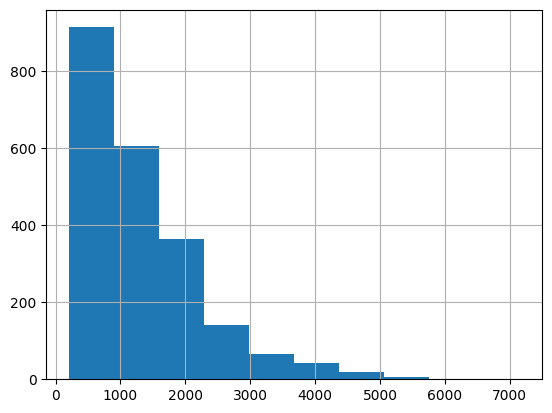

In [21]:
df.final_price.hist()

**Question 1**
There's one column with missing values. What is it?

*   'ram'
*   'storage'
*   'screen'
*   'final_price'

In [22]:
df[columns].isna().sum() >0

,0
ram,False
storage,False
screen,True
final_price,False


**Question 2**
What's the median (50% percentile) for variable 'ram'?

*   8
*   16
*   24
*   32

In [23]:
ram_med = df['ram'].median()

print('Median of ram variable:', ram_med)

Median of ram variable: 16.0


Prepare and split the dataset
Shuffle the dataset (the filtered one you created above), use seed 42.
Split your data in train/val/test sets, with 60%/20%/20% distribution.
Use the same code as in the lectures

In [24]:
filt_df = df[columns]
n = len(filt_df)

n_test = int((n*0.2))
n_val = int((n*0.2))
n_train = int(n - n_test - n_val)

n_train, n_val, n_test

(1296, 432, 432)

In [25]:
filt_df = df[columns]
n = len(filt_df)

n_test = int((n*0.2))
n_val = int((n*0.2))
n_train = int((n - n_test - n_val))

idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_train = filt_df.loc[idx[:n_train]]
df_val = filt_df.loc[idx[n_train:n_train+n_val]]
df_test = filt_df.loc[idx[n_train+n_val:]]

print('Length of train: ',len(df_train))
print('Length of val: ',len(df_val))
print('Length of test: ',len(df_test))

Length of train:  1296
Length of val:  432
Length of test:  432


**Question 3**


*   We need to deal with missing values for the column from Q1.
*   We have two options: fill it with 0 or with the mean of this variable.
*   Try both options. For each, train a linear regression model without regularization using the code from the lessons.
*   For computing the mean, use the training only!
*   Use the validation dataset to evaluate the models and compare the RMSE of each option.
*   Round the RMSE scores to 2 decimal digits using round(score, 2)
*   Which option gives better RMSE?

Options:

*   With 0
*   With mean
*   Both are equally good

In [33]:
X_train = df_train.drop('final_price',axis=1).fillna(0)
y_train = df_train.final_price
X_val = df_val.drop('final_price',axis=1).fillna(0)
y_val = df_val.final_price

def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

w0, w = train_linear_regression(X_train,y_train)

y_pred = w0 + X_val.dot(w)

def rmse(y, y_pred):
    se = (y - y_pred) **2
    mse = se.mean()

    return np.sqrt(mse)

print('RMSE:' ,rmse(y_val,y_pred))

RMSE: 565.4520868771027


In [45]:
X_train = df_train.drop('final_price',axis=1).fillna(df_train.screen.mean())
y_train = df_train.final_price
X_val = df_val.drop('final_price',axis=1).fillna(df_train.screen.mean())
y_val = df_val.final_price

w0, w = train_linear_regression(X_train,y_train)
y_pred = w0 + X_val.dot(w)

print('RMSE:' ,rmse(y_val,y_pred))

RMSE: 566.8493872813442


**Question 4**
* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which r gives the best RMSE?
* If there are multiple options, select the smallest

Options:

* 0
* 0.01
* 1
* 10
* 100

In [46]:
def train_linear_regression_reg(X,y,r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = df_train.drop('final_price',axis=1).fillna(0)
    w0, w = train_linear_regression_reg(X_train, y_train,r=r)
    y_pred = w0 + X_val.dot(w)
    print('RMSE:' ,rmse(y_val,y_pred))

RMSE: 566.8944314676934
RMSE: 566.890752471792
RMSE: 566.858126430886
RMSE: 566.574395901238
RMSE: 565.8746544019414
RMSE: 565.5340414099755
RMSE: 565.2922866540451


**Question 5**
* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits (round(std, 3))


What's the value of std?

* 19.176
* 29.176
* 39.176
* 49.176

In [47]:
filt_df = df[columns]
n = len(filt_df)

n_test = int((n*0.2))
n_val = int((n*0.2))
n_train = int((n - n_test - n_val))

idx = np.arange(n)

scores = []

for s in range(10):
  np.random.seed(s)
  np.random.shuffle(idx)

  df_train = filt_df.loc[idx[:n_train]]
  df_val = filt_df.loc[idx[n_train:n_train+n_val]]
  df_test = filt_df.loc[idx[n_train+n_val:]]

  X_train = df_train.drop('final_price',axis=1).fillna(0)
  y_train = df_train.final_price
  X_val = df_val.drop('final_price',axis=1).fillna(0)
  y_val = df_val.final_price

  w0, w = train_linear_regression(X_train,y_train)
  y_pred = w0 + X_val.dot(w)
  error = rmse(y_val,y_pred)
  scores.append(error)

print(round(np.std(scores),3))

33.49


**Question 6**

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with r=0.001.

What's the RMSE on the test dataset?

Options:

* 598.60
* 608.60
* 618.60
* 628.60

In [48]:
filt_df = df[columns]
n = len(filt_df)

n_test = int((n*0.2))
n_val = int((n*0.2))
n_train = int((n - n_test - n_val))

idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_train = filt_df.loc[idx[:n_train]]
df_val = filt_df.loc[idx[n_train:n_train+n_val]]
df_test = filt_df.loc[idx[n_train+n_val:]]

y_train = df_train.final_price
y_val = df_val.final_price
X_test = df_test.drop('final_price',axis=1).fillna(0)
y_test = df_test.final_price

X = pd.concat([df_train, df_val], axis=0).drop('final_price',axis=1).fillna(0)
y = pd.concat([y_train, y_val], axis=0)

w0, w = train_linear_regression_reg(X,y,r=0.001)
y_pred = w0 + X_test.dot(w)
print('RMSE:' ,rmse(y_test,y_pred))


RMSE: 608.609982204956
